<a href="https://colab.research.google.com/github/anamilanezi/ebac-dados/blob/main/exercicios/em15-visualizacao-de-dados-II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


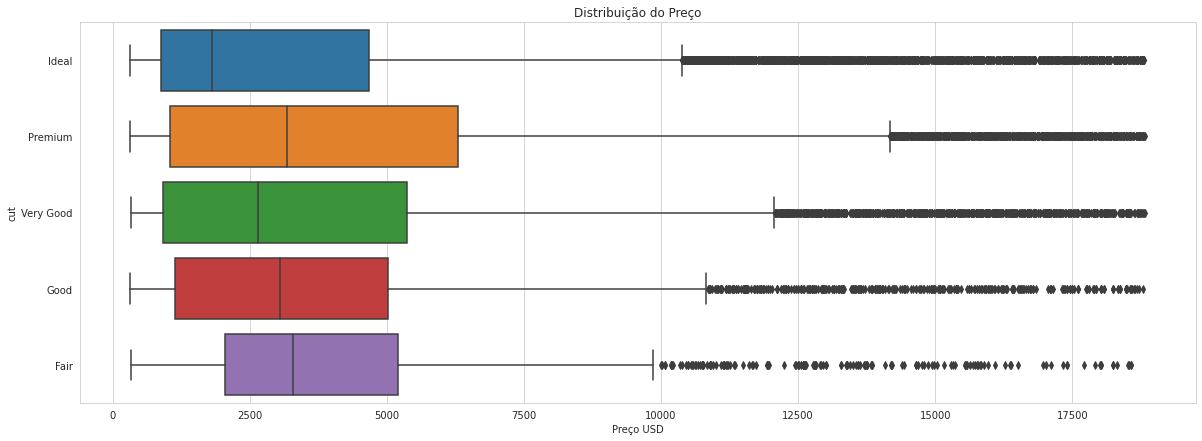

In [11]:
# gráfico do exercício 1


with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=data["price"], y=data['cut'])
  grafico.set(title='Distribuição do Preço', xlabel='Preço USD');
  grafico.figure.set_size_inches(w=20, h=7)

**Insight do gráfico 1**: ...

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [7]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


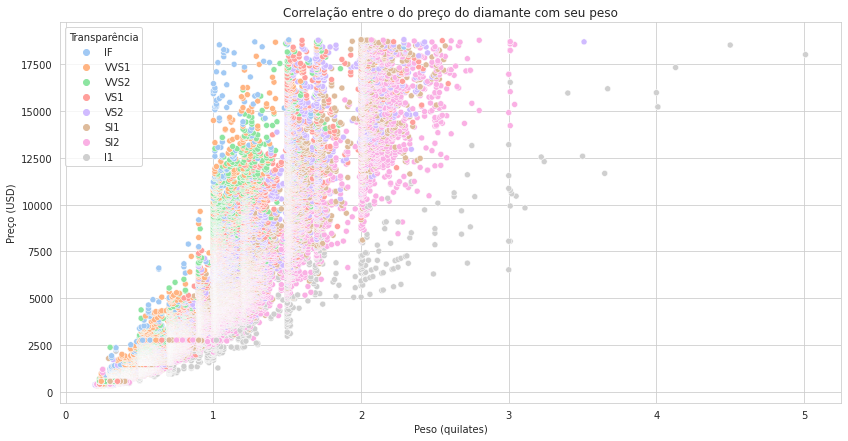

In [9]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=data, x="carat", y="price", hue="clarity", palette="pastel")
  grafico.set(title='Correlação entre o do preço do diamante com seu peso', xlabel='Peso (quilates)', ylabel='Preço (USD)');
  grafico.get_legend().set_title("Transparência");
  grafico.figure.set_size_inches(w=14, h=7)

**Insight do gráfico 2**: ...

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [12]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


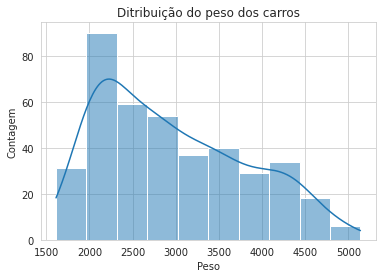

In [14]:
# gráfico do exercício 3

with sns.axes_style('whitegrid'):

  grafico = sns.histplot(data, x=data['weight'], kde=True)
  grafico.set(title='Ditribuição do peso dos carros', xlabel='Peso', ylabel='Contagem');

  #   grafico = sns.histplot(data, x=data['weight'], hue="survived", kde=True)
  # grafico.set(title='Idade por sobrevivência', xlabel='Idade', ylabel='Contagem');
  # grafico.get_legend().set_title("Sobreviveu?");

**Insight do gráfico 3**: ...

---